Возьмем уже известный вам датасет

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

dataset = datasets.load_iris()

X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

Теперь посмотрим как выглядят наши выборки (берем только первые 2 фичи)

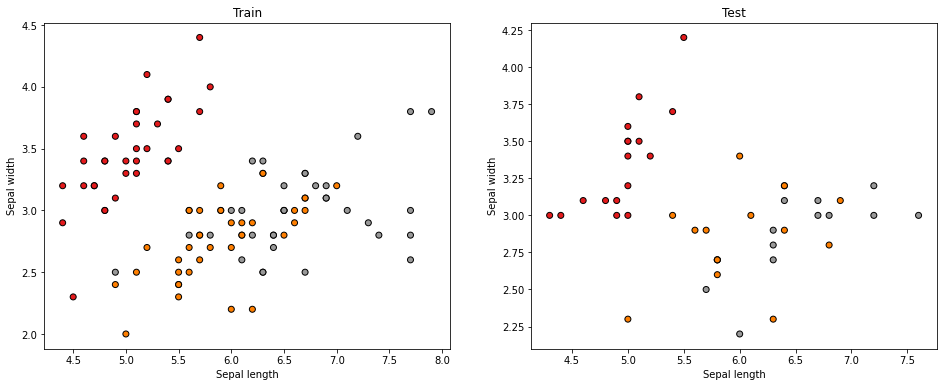

In [2]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))
plt.subplot(121)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Train')

plt.subplot(122)

# Plot the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Test')

plt.show()

Теперь перейдем к алгоритму KNN. Он подразумевает то, что мы для каждой точки из тестовой выборки ищем K ближайших соседей из обучающей. Ближайшие по какой-то метрике. Пусть будет по евклидовой. Реализуйте ее.  
Предполагается, что первый элемент будет массивом из координат 1 точки, второй будет матрицей.

In [ ]:
def euclidian_distance(a, b):
    pass

In [ ]:
dist_arr = euclidian_distance(np.array([1,1]), np.array([[0,1], [1, 0]]))
assert np.array_equal(dist_arr, np.array([1., 1.])), 'Test failed!'

Далее, нам для каждого элемента тестовой выборки надо знать K точек из тестовой, расстояние до которых минимально. Реализуйте метод, который возвращает для каждой точки из X_test минимальные расстояния до точек из X_train и индексы таких точек.  
В результате должны получиться две матрица размера X_test.shape[0] х n_neighbors

In [ ]:
def kneighbors(X_train, X_test, n_neighbors, return_distance=True):
    pass

In [ ]:
neigh_dist, neigh_ind = kneighbors(np.array([[1,1], [0, 0]]), np.array([[-1, 0], [0,1]]), 1)
assert np.array_equal(neigh_dist, np.array([[1.], [1.]])), 'Test failed!'
assert np.array_equal(neigh_ind, np.array([[1], [0]])), 'Test failed!'

Теперь напишем предсказание для теста. Реализуйте метод, который будет по матрице с индексами ближайших точек из X_train получать метку для точек из X_test.  
P.S. [bincount](https://pyprog.pro/statistics_functions/bincount.html)

In [ ]:
def predict(X_train, y_train, X_test, n_neighbors):
    pass

In [ ]:
pred = predict(np.array([[1,1], [0, 0]]), np.array([10, 100]), np.array([[-1, 0], [0,1]]), 1)
assert np.array_equal(pred, np.array([100, 10])), 'Test failed!'

Чтобы как-то измерить результаты модели, реализуйте метрику accuracy разделив верно предсказанные классы на размер выборки

In [ ]:
def score(y_true, y_pred):
    pass

In [ ]:
metric = score(np.array([0,0,0,0,1]), np.array([1,1,1,1,1]))
assert np.array_equal(metric, 0.2), 'Test failed!'

Протестируйте вашу модель

In [ ]:
y_pred = predict(X_train, y_train, X_test, 3)
assert score(y_test, y_pred) > 0.95, 'Model score is too low'

#### Дополнительно

Теперь реализуйте классифкатор в виде класса и сравните с реализацией sklearn.  
Следуя общепринятой нотации реализуйте следующие методы:
- fit(X_train, y_train) тут мы обучаем нашу модель. Для KNN просто запоминаем данные
- predict_proba(X_test) здесь мы предскажем вероятность отнесения к каждому классу элементов теста. Вероятность будем считать как отношение ближайших точек каждого класса к числу рассматриваемых соседей.
- predict(X_test) а тут мы в результате выдадим уже метки классов для теста. Часто реализация метода выглядит как argmax от predict_proba.
- score(X_test, y_test) сразу посчитаем значение метрики точности

In [ ]:
class KNN:
    def __init__(self, n_neighbors=3):
        pass
        
    def euclidian_distance(self, a):
        pass
    
    def fit(self, X_train, y_train):
        pass
    
    def kneighbors(self, X_test, return_distance=True):
        pass
    
    def predict_proba(self, X_test):
        pass
    
    def predict(self, X_test):
        pass
    
    def score(self, X_test, y_test):
        pass

Теперь сравните реализации

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

cl = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
cl.score(X_test, y_test)

In [ ]:
cl = KNN(n_neighbors=3).fit(X_train, y_train)
cl.score(X_test, y_test)

Также сравните скорость работы

In [ ]:
%%timeit 
cl = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
cl.predict(X_test)

In [ ]:
%%timeit 
cl = KNN(n_neighbors=3).fit(X_train, y_train)
cl.predict(X_test)

Для проверки поместите реализованный класс в питон скрипт с названием Фамилия\_И\_О_KNN.py (ФИО латиницей)
https://forms.gle/VYyHaPnhevrS2gLr8